# Marketing Analytics

Finding out the RFM of a customer. this can be used for calculating\
Assigning loyalty levels for customers\
Customer live time value analysis 

For this research we will want ot assign loyalty levels to a customer data we have. 

In [70]:
#import the necessary libraries
import pandas as pd
import warnings
import datetime as dt
warnings.filterwarnings('ignore')

In [71]:
#read the data uisng pandas 
df = pd.read_excel('SStore_data.xls')
print("Total number of transactions happened in the given period: "+ str(df.shape[0]))
#visualize the data for clarity
df.head(4)


Total number of transactions happened in the given period: 9994


,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310


In [72]:
#
data = df[df['Sales'] > 0]
print("Total number of possitive transactions happened in the same period: "+ str(df.shape[0]))
df.describe()


Total number of possitive transactions happened in the same period: 9994


,Row ID,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,4997.500000,55190.379428,229.858001,3.789574,0.156203,28.656896
std,2885.163629,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1.000000,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,90008.000000,209.940000,5.000000,0.200000,29.364000
max,9994.000000,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [73]:
# Explore the data set by Printing the details of the dataset
maxdate = df['Order Date'].dt.date.max()
mindate = df['Order Date'].dt.date.min()
unique_cust = df['Customer ID'].nunique()
tot_quantity = df['Quantity'].sum()
tot_sales = df['Sales'].sum()


print(f"The Time range of transactions is: {mindate} to {maxdate}")
print(f"Total number of unique customers: {unique_cust}")
print(f"Total Quantity Sold: {tot_quantity}")
print(f"Total Sales for the period: ${tot_sales})")

The Time range of transactions is: 2014-01-03 to 2017-12-30
Total number of unique customers: 793
Total Quantity Sold: 37873
Total Sales for the period: $2297200.8603000003)


In [74]:
# Make the date_placed column datetime
df['Order Date']= pd.to_datetime(df['Order Date'])


In [75]:
#group the data by customer name, creat new columns Order date, the 
rfmTable = df.groupby('Customer Name').agg({'Order Date': lambda x: (x.max() - x.min()).days, # Recency
                                        'Order ID': lambda x: len(x),      # Frequency
                                        'Sales': lambda x: x.sum()})        # Monetary Value



In [76]:
#Change col names of our new table 
rfmTable['Order Date'] = rfmTable['Order Date'].astype(int)
rfmTable.rename(columns={'Order Date': 'Recency', 
                         'Order ID': 'Frequency', 
                         'Sales': 'MoneyValue'}, inplace=True)

In [77]:
#Quick visual of a few records
rfmTable.head()

,Recency,Frequency,MoneyValue
Customer Name,,,
Aaron Bergman,996,6,886.156
Aaron Hawkins,1336,11,1744.700
Aaron Smayling,1164,10,3050.692
Adam Bellavance,780,18,7755.620
Adam Hart,1106,20,3250.337


Percentage of one time buuyers 0.0 %


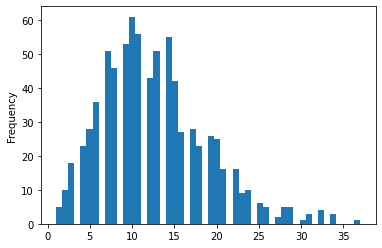

In [86]:
#visualize the frequency

rfmTable['Frequency'].plot(kind= 'hist', bins =50)
rfmTable['Frequency'].describe()
oneTimecustomers = round(sum(rfmTable['Frequency']== 0)/float(len(rfmTable))*(100),2)
print("Percentage of one time buuyers", oneTimecustomers, "%")

### The result is quite interesting as most of the customers are repeat customers

In [36]:
#Quick look at customer name, view history of purchase
Cust1 = df[df['Customer Name']=='Claire Gute']
Cust1

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.960,2,0.0,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.940,3,0.0,219.5820
5491,5492,CA-2017-164098,2017-01-26,2017-01-27,First Class,CG-12520,Claire Gute,Consumer,United States,Houston,...,77070,Central,OFF-ST-10000615,Office Supplies,Storage,"SimpliFile Personal File, Black Granite, 15w x...",18.160,2,0.2,1.8160
6877,6878,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,75217,Central,FUR-FU-10004952,Furniture,Furnishings,C-Line Cubicle Keepers Polyproplyene Holder w/...,131.376,6,0.6,-95.2476
6878,6879,US-2015-123918,2015-10-15,2015-10-15,Same Day,CG-12520,Claire Gute,Consumer,United States,Dallas,...,75217,Central,OFF-PA-10003001,Office Supplies,Paper,Xerox 1986,5.344,1,0.2,1.8704


In [37]:
Cust1.shape[0]

5

## Determining RFM Quartiles

In [60]:
#set the quatile values 
quant = rfmTable.quantile(q=[0.25,0.5,0.75])
#visualize the values
quant 

,Order Date,Order ID,Sales
0.25,829.0,8.0,1146.050
0.50,1092.0,12.0,2256.394
0.75,1222.0,16.0,3785.276


In [61]:
#copy to dictionary
quant = quant.to_dict()
#visualize once more
quant


{'Order Date': {0.25: 829.0, 0.5: 1092.0, 0.75: 1222.0},
 'Order ID': {0.25: 8.0, 0.5: 12.0, 0.75: 16.0},
 'Sales': {0.25: 1146.0500000000002, 0.5: 2256.394, 0.75: 3785.276}}

{'Recency': {0.25: 31.0, 0.5: 76.0, 0.75: 184.0},
 'Frequency': {0.25: 8.0, 0.5: 12.0, 0.75: 16.0},
 'MoneyValue': {0.25: 1146.0500000000002, 0.5: 2256.394, 0.75: 3785.276}}

## Creating the RFM segmentation table

In [21]:
rfmSeg = rfmTable

In [22]:
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def RClass(x,p,d):
    if x <= d[p][0.25]:
        return 1
    elif x <= d[p][0.50]:
        return 2
    elif x <= d[p][0.75]: 
        return 3
    else:
        return 4
    
# Arguments (x = value, p = recency, monetary_value, frequency, k = quartiles dict)
def FMClass(x,p,d):
    if x <= d[p][0.25]:
        return 4
    elif x <= d[p][0.50]:
        return 3
    elif x <= d[p][0.75]: 
        return 2
    else:
        return 1

In [23]:
rfmSeg['R_Quartile'] = rfmSeg['Recency'].apply(RClass, args=('Recency',quant,))
rfmSeg['F_Quartile'] = rfmSeg['Frequency'].apply(FMClass, args=('Frequency',quant,))
rfmSeg['M_Quartile'] = rfmSeg['MoneyValue'].apply(FMClass, args=('MoneyValue',quant,))

In [24]:
rfmSeg['RFMClass'] = rfmSeg.R_Quartile.map(str) \
                            + rfmSeg.F_Quartile.map(str) \
                            + rfmSeg.M_Quartile.map(str)

In [25]:
rfmSeg.sort_values(by=['RFMClass'])

,Recency,Frequency,MoneyValue,R_Quartile,F_Quartile,M_Quartile,RFMClass
Customer Name,,,,,,,
Kunst Miller,29,28,4909.472,1,1,1,111
Natalie DeCherney,28,18,4326.139,1,1,1,111
James Galang,2,18,6366.392,1,1,1,111
William Brown,21,37,6160.102,1,1,1,111
Kelly Lampkin,17,22,5016.488,1,1,1,111
...,...,...,...,...,...,...,...
Susan Gilcrest,227,5,47.946,4,4,4,444
Julia Dunbar,301,6,695.442,4,4,4,444
Karen Seio,296,4,88.472,4,4,4,444


In [87]:
rfmSeg["Score"] = rfmSeg[['R_Quartile', 'F_Quartile', 'M_Quartile']].sum(axis=1)
rfmSeg.head()

,Recency,Frequency,MoneyValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,Score
Customer Name,,,,,,,,
Aaron Bergman,416,6,886.156,4,4,4,444,12
Aaron Hawkins,13,11,1744.700,1,3,3,133,7
Aaron Smayling,89,10,3050.692,3,3,2,332,8
Adam Bellavance,55,18,7755.620,2,1,1,211,4
Adam Hart,35,20,3250.337,2,1,2,212,5


### Understanding


From the RFMClass column it can be clear that the three digit numbers are the representing three values of the RFM scale. 
from businesss perspective.

We can assign Loyalty score to 

In [88]:
# Group into Loyalty levels
loyalty = ['Bronze', 'Silver', 'Gold', 'Platinum']
rfmSeg['Loyalty_Level'] = pd.qcut(rfmSeg['Score'], q=4, labels= loyalty)
rfmSeg.head()

,Recency,Frequency,MoneyValue,R_Quartile,F_Quartile,M_Quartile,RFMClass,Score,Loyalty_Level
Customer Name,,,,,,,,,
Aaron Bergman,416,6,886.156,4,4,4,444,12,Platinum
Aaron Hawkins,13,11,1744.700,1,3,3,133,7,Silver
Aaron Smayling,89,10,3050.692,3,3,2,332,8,Silver
Adam Bellavance,55,18,7755.620,2,1,1,211,4,Bronze
Adam Hart,35,20,3250.337,2,1,2,212,5,Bronze
